In [1]:
from keras.models import Sequential,Graph
from keras.layers.convolutional import Convolution2D,Convolution3D
from keras.layers.recurrent_convolutional import LSTMConv2D
from keras.layers.normalization import BatchNormalization


seq = Sequential()
seq.add(LSTMConv2D(nb_filter=40, nb_row=3, nb_col=3, input_shape=(None,40,40,1),
                   border_mode="same",return_sequences=True))
seq.add( BatchNormalization())

seq.add(LSTMConv2D(nb_filter=40,nb_row=3, nb_col=3,
                   border_mode="same", return_sequences=True))
seq.add( BatchNormalization())

seq.add(LSTMConv2D(nb_filter=40, nb_row=3, nb_col=3,
                   border_mode="same", return_sequences=True))
seq.add( BatchNormalization())

seq.add(LSTMConv2D(nb_filter=40, nb_row=3, nb_col=3,
                   border_mode="same", return_sequences=True))
seq.add( BatchNormalization())

seq.add(Convolution3D(nb_filter=1, kernel_dim1=1, kernel_dim2=3,
                      kernel_dim3=3, activation='sigmoid',
                   border_mode="same", dim_ordering="tf"))

seq.compile(loss="binary_crossentropy",optimizer="adadelta")

Using Theano backend.
Using gpu device 0: GeForce GTX 660 (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.


#Creating training data
 
 I added som noise to make it more robust

In [2]:
#test
time=15
row=80
col=80
filters=1
training=1200
train = np.zeros((training,time,row,col,1),dtype=np.float) 
gt = np.zeros((training,time,row,col,1),dtype=np.float) 
#for i in range(1000):
#    gt[::,0,0,0] = np.random.random()

for i in range(training):
    n = random.randint(3,8)
    #n=15
    for j in range(n):
        xstart = np.random.randint(20,60)
        ystart = np.random.randint(20,60)
        directionx = np.random.randint(0,3) - 1
        directiony = np.random.randint(0,3) - 1
        directionx = np.random.randint(0,3) - 1
        gravity =  0#np.random.randint(0,3) - 1
        w = np.random.randint(2,4)
        #rint directionx,directiony
        for t in range(time):
            #w = 2
            train[i,t,xstart + directionx*t-w:xstart + directionx*t+w,
                      ystart + directiony*t + int(0.1*gravity*t**2)-w:ystart + directiony*t + int(0.1*gravity*t**2)+w,0] += 1
            
            #Make it more robust
            #Noise
            if np.random.randint(0,2):
                train[i,t,xstart + directionx*t-w-1:xstart + directionx*t+w+1,
                      ystart + directiony*t + int(0.1*gravity*t**2)-w-1:ystart + directiony*t + int(0.1*gravity*t**2)+w+1,0] += 0.1
         
            if np.random.randint(0,2):
                train[i,t,xstart + directionx*t-w+1:xstart + directionx*t+w-1,
                      ystart + directiony*t + int(0.1*gravity*t**2)+w-1:ystart + directiony*t + int(0.1*gravity*t**2)+w-1,0] -= 0.1
         
            
            gt[i,t,xstart + directionx*(t+1)-w:xstart + directionx*(t+1)+w,
                      ystart + directiony*(t+1) + int(0.1*gravity*(t+1)**2)-w:ystart + directiony*(t+1) + int(0.1*gravity*(t+1)**2)+w,0] += 1


train = train[::,::,20:60,20:60,::]
gt = gt[::,::,20:60,20:60,::]
train[train >= 1] = 1
gt[gt >= 1 ] = 1


#Fitting the data (I also provide trained weights)

In [1]:
seq.fit(train[:1000],gt[:1000], batch_size=10, 
                  nb_epoch=100,validation_split=0.05)


In [3]:
seq.load_weights("./test3")

## For one initial configurations predict the next 16 steps

In [6]:
which = 1004 #1008
track = train[which][:7,::,::,::]
print track.shape
for j in range(16):
    new_pos = seq.predict(track[newaxis,::,::,::,::])
    print track.shape,new_pos[0,-1,::,::,::].shape
    new = new_pos[::,-1,::,::,::]  
    #new[new > 0.5] = 1
    track = np.concatenate((track,new),axis=0)

(7, 40, 40, 1)
(7, 40, 40, 1) (40, 40, 1)
(8, 40, 40, 1) (40, 40, 1)
(9, 40, 40, 1) (40, 40, 1)
(10, 40, 40, 1) (40, 40, 1)
(11, 40, 40, 1) (40, 40, 1)
(12, 40, 40, 1) (40, 40, 1)
(13, 40, 40, 1) (40, 40, 1)
(14, 40, 40, 1) (40, 40, 1)
(15, 40, 40, 1) (40, 40, 1)
(16, 40, 40, 1) (40, 40, 1)
(17, 40, 40, 1) (40, 40, 1)
(18, 40, 40, 1) (40, 40, 1)
(19, 40, 40, 1) (40, 40, 1)
(20, 40, 40, 1) (40, 40, 1)
(21, 40, 40, 1) (40, 40, 1)
(22, 40, 40, 1) (40, 40, 1)


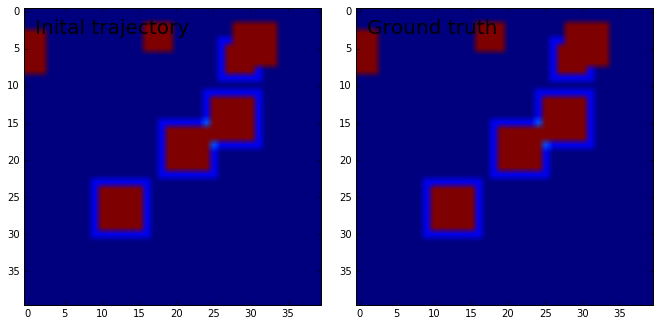

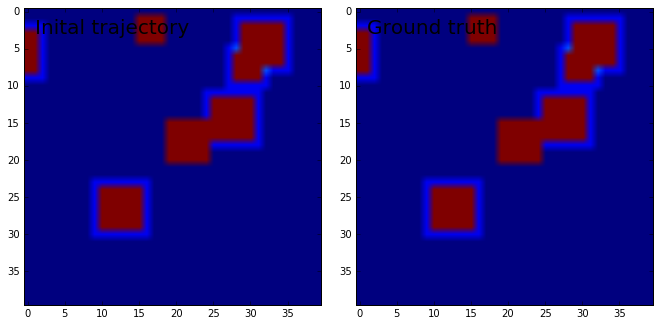

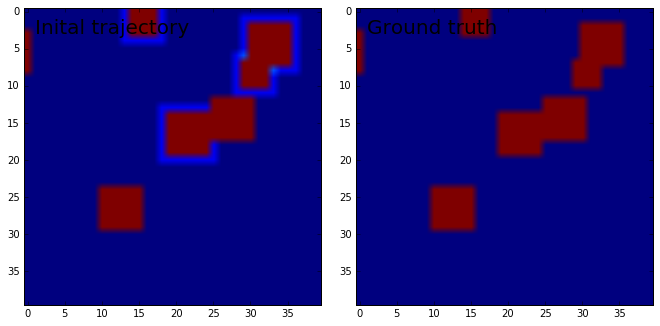

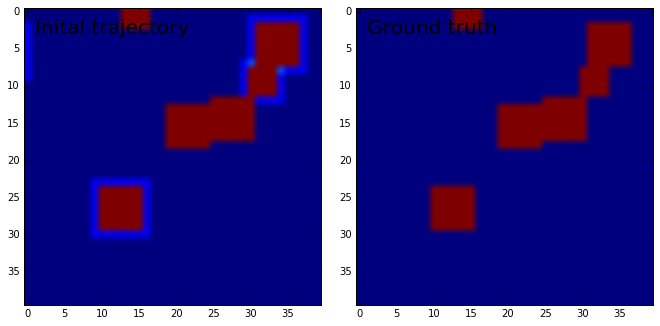

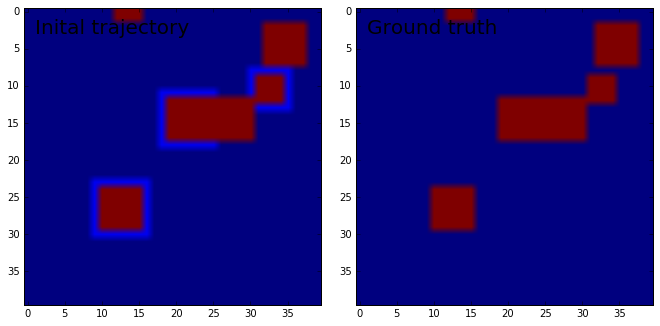

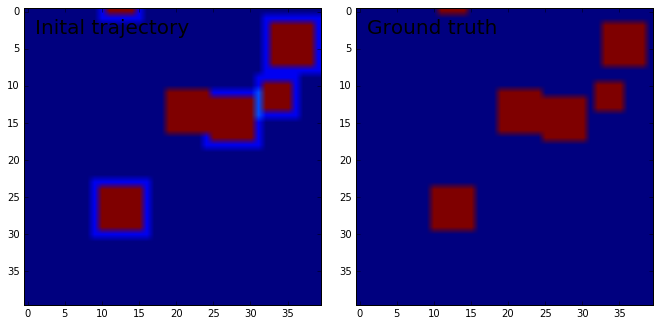

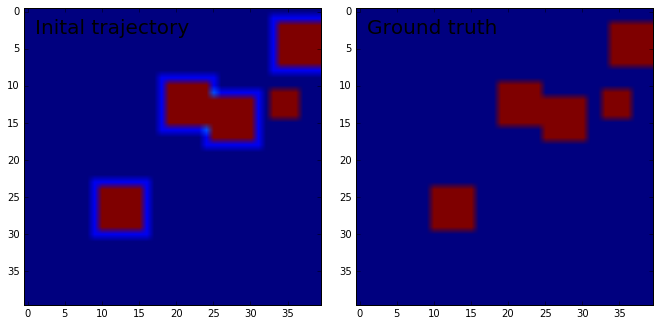

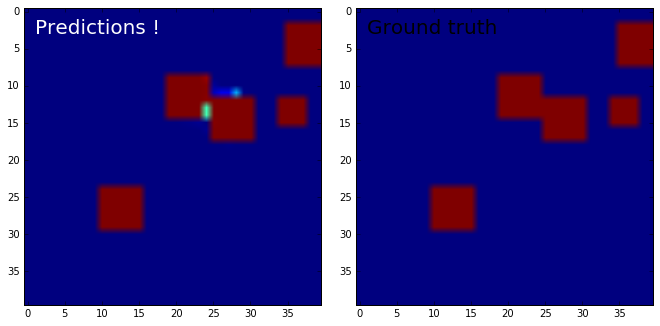

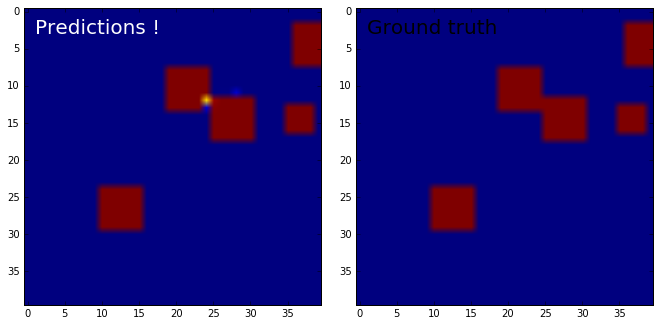

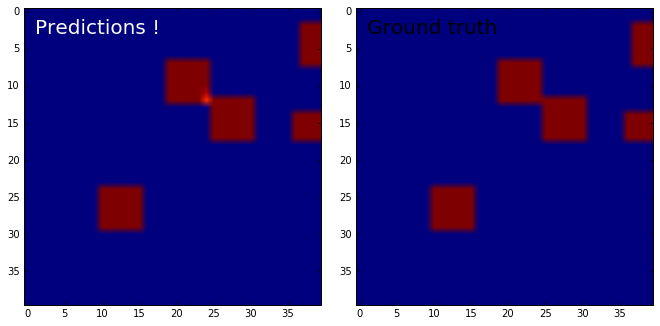

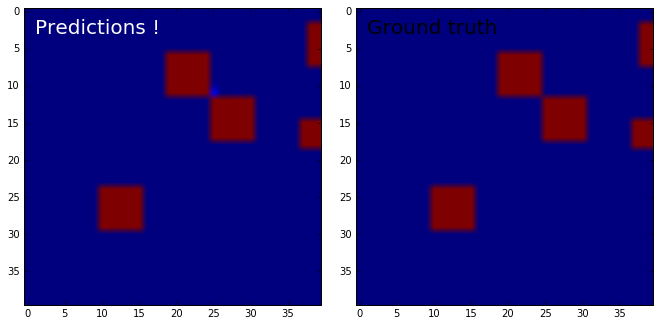

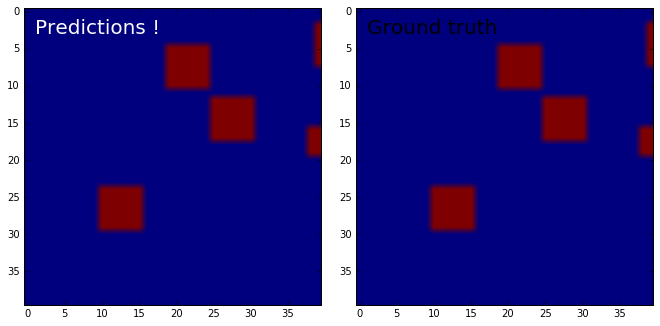

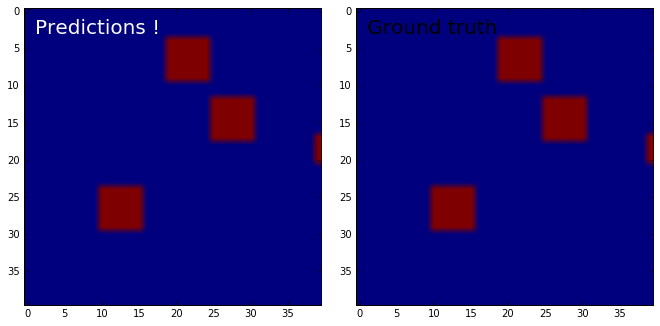

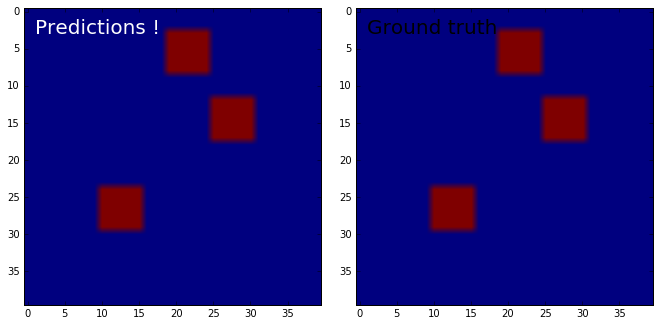

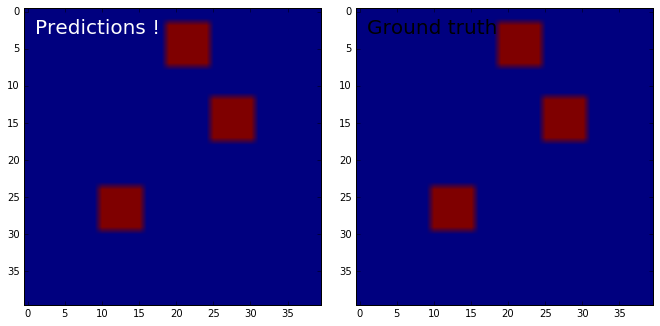

In [7]:
track2 = train[which][::,::,::,::]
#which = 1003
for i in range(15):
    fig = figure(figsize=(10,5))

    ax = fig.add_subplot(121)
    
    if i >= 7:
        ax.text(1,3,"Predictions !",fontsize=20,color="w")
    else:
        ax.text(1,3,"Inital trajectory",fontsize=20)
        
    toplot = track[i,::,::,0]
    #toplot[toplot >= 1] = 1
    #if i >= 1:
    #toplot = train[which][i,::,::,0]
    #print i
    """f = fig.add_subplot(4,4,i+1)
    
    imshow(toplot)"""
    imshow(toplot)
    ax = fig.add_subplot(122)
    text(1,3,"Ground truth",fontsize=20)

    
    toplot = track2[i,::,::,0]
    if i >= 2:
        toplot = gt[which][i-1,::,::,0]
    #toplot = train[which][i,::,::,0]
    #toplot[toplot >= 1] = 1
    #print i
    """f = fig.add_subplot(4,4,i+1)
    
    imshow(toplot)"""
    imshow(toplot)
    savefig("%i_animate.png"%(i+1))

## For ten initial configurations check the prediction

In [4]:
pred = seq.predict(train[1100:1110],batch_size=2)
start =1100
for i in range(10):
    #print np.sum ((gt[i+start,::,::,0] - np.sum(train[i+start,::,::,::,0],axis=0))*pred[i,::,::,0])
    #print 
    fig = figure(figsize=(20,10))
    ax = fig.add_subplot(1,5,1)
    imshow(gt[i+start,6,::,::,0])
    ax = fig.add_subplot(1,5,2)
    imshow(pred[i,6,::,::,0])
    
    ax = fig.add_subplot(1,5,3)
    imshow(pred[i,6,::,::,0]*(1-(gt[i+start,6,::,::,0])))
    x = fig.add_subplot(1,5,4)
    imshow(pred[i,6,::,::,0]*(1-(gt[i+start,5,::,::,0])))
    
    ax = fig.add_subplot(1,5,5)
    imshow(np.sum(train[i+start,::,::,::,0],axis=0))
    
    